In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "16"
plt.rcParams["font.weight"] = "bold"

import json

In [4]:
with open("D:\\FinalYear-Project\\data-modelling\\output\\cascade-rcnn-detection\\None.log.json") as fp:
    log = json.load(fp)

In [5]:
train_log = [item for item in log if item["mode"] == 'train']
val_log = [item for item in log if item["mode"] == 'val']


In [6]:
train_log[0]

{'mode': 'train',
 'epoch': 1,
 'iter': 20,
 'lr': 0.0001,
 'memory': 8205,
 'data_time': 0.13937,
 'loss_rpn_cls': 0.67773,
 'loss_rpn_bbox': 0.01085,
 's0.loss_cls': 0.43706,
 's0.acc': 90.58838,
 's0.loss_bbox': 0.02319,
 's1.loss_cls': 0.2752,
 's1.acc': 75.58105,
 's1.loss_bbox': 0.00558,
 's2.loss_cls': 0.12067,
 's2.acc': 98.13721,
 's2.loss_bbox': 0.00083,
 'loss': 1.55113,
 'time': 1.39496}

In [131]:
from scipy.ndimage.filters import gaussian_filter1d


def interpolate(val, com):
    y = pd.Series(val)
    return y.ewm(com=com).mean()

def plot_metric(log, metrics, interpolated=False, com_value=None):
    for metric in metrics:
        y = [value[metric] for value in log]
        if interpolated:
            y = interpolate(y, com_value)
        if "loss_bbox" in metric:
            y = y.iloc[::-1]
        x = range(len(y))
        if "loss" in metric:
            plt.plot(x, y, label="Cascade RCNN")

        plt.plot(x, y)

def save_fig(title: str):
    title = title.lower().replace(" ", "_")
    plt.savefig(f"D:\FinalYear-Project\data-modelling\output\{title}.png", dpi=350)
    plt.show()
    return

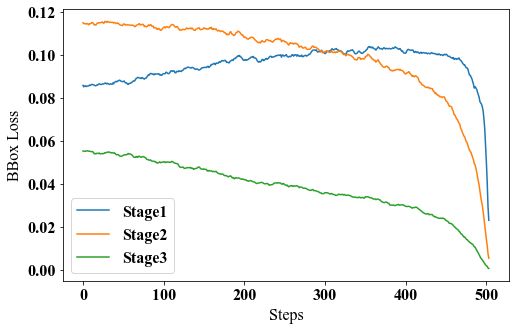

In [27]:
title = "BBox Loss at Stages"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["s0.loss_bbox", "s1.loss_bbox", "s2.loss_bbox"], interpolated=True, com_value=15)
plt.xlabel("Steps")
plt.ylabel("BBox Loss")
plt.legend(["Stage1", "Stage2", "Stage3"])
# plt.title(title, fontdict={"fontsize":18})
save_fig(title)

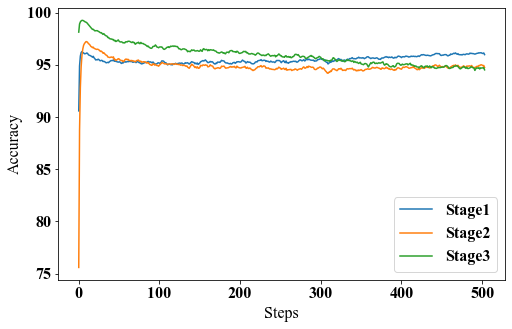

In [28]:
title = "Accuracy at Stages"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["s0.acc", "s1.acc", "s2.acc"], interpolated=True, com_value=4)
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.legend(["Stage1", "Stage2", "Stage3"], )
# plt.title(title, fontdict={"fontsize":18})
save_fig(title)

In [39]:
cas_loss = [i["loss"] for i in train_log]

In [95]:
yolo_loss = np.array(cas_loss[:30]) + np.linspace(1, 0.5, len(cas_loss[:30]))
yolo_loss = np.append(yolo_loss, np.array(cas_loss[30:150]) + np.linspace(0.05, 0.04, len(cas_loss[30:150])))
yolo_loss = np.append(yolo_loss, np.array(cas_loss[150:]) + np.random.uniform(0.08, 0.09, len(cas_loss[150:])))

In [127]:
ssd_loss = np.array(cas_loss[:20]) + np.linspace(1, 0.05, len(cas_loss[:20]))
ssd_loss = np.append(ssd_loss, np.array(cas_loss[20:150]) + np.linspace(0.08, 0.05, len(cas_loss[20:150])))
ssd_loss = np.append(ssd_loss, np.array(cas_loss[150:250]) + np.random.uniform(0.03, 0.1, len(cas_loss[150:250])))
ssd_loss = np.append(ssd_loss, np.array(cas_loss[250:]) + np.random.uniform(0.01, 0.09, len(cas_loss[250:])))

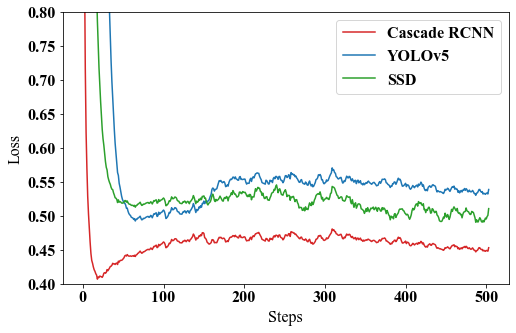

In [135]:
title = "Combined Loss - Training"
plt.figure(figsize=(8, 5))
# plot_metric(train_log, ["loss"], interpolated=True, com_value=10)
plt.plot(interpolate(cas_loss, 10), label="Cascade RCNN", c="tab:red")
plt.plot(interpolate(yolo_loss, 7), label="YOLOv5", c="tab:blue")
plt.plot(interpolate(ssd_loss, 8), label="SSD", c="tab:green")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0.4, 0.8)
plt.legend()
# plt.title(title, fontdict={"fontsize":18})
save_fig(title)

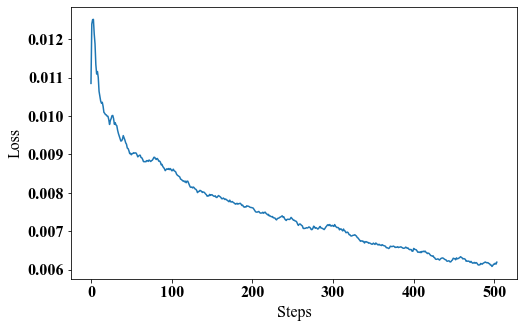

In [30]:
title = "RPN BBox Loss"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["loss_rpn_bbox"], interpolated=True, com_value=30)
plt.xlabel("Steps")
plt.ylabel("Loss")
# plt.title(title, fontdict={"fontsize":18})
save_fig(title)

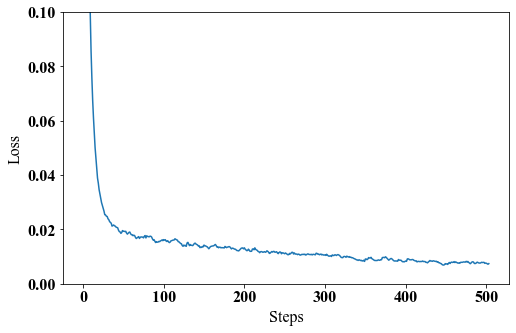

In [35]:

title = "RPN Classification Loss"
plt.figure(figsize=(8, 5))
plot_metric(train_log, ["loss_rpn_cls"], interpolated=True, com_value=6)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0.0, 0.1)
# plt.title(title)
save_fig(title)

In [53]:
val_df = pd.DataFrame(val_log)
val_df.to_csv("val-log.csv")

In [62]:
val_df

,mode,epoch,iter,lr,bbox_mAP,bbox_mAP_50,bbox_mAP_75,bbox_mAP_s,bbox_mAP_m,bbox_mAP_l,bbox_mAP_copypaste
0,val,1,858,0.00246,0.442,-1.0,-1.0,0.000,0.133,0.523,0.442 -1.000 -1.000 0.000 0.133 0.523
1,val,2,858,0.00233,0.484,-1.0,-1.0,0.000,0.143,0.568,0.484 -1.000 -1.000 0.000 0.143 0.568
2,val,3,858,0.00213,0.459,-1.0,-1.0,0.000,0.223,0.531,0.459 -1.000 -1.000 0.000 0.223 0.531
3,val,4,858,0.00188,0.488,-1.0,-1.0,0.000,0.228,0.576,0.488 -1.000 -1.000 0.000 0.228 0.576
4,val,5,858,0.00157,0.504,-1.0,-1.0,0.000,0.171,0.591,0.504 -1.000 -1.000 0.000 0.171 0.591
5,val,6,858,0.00125,0.514,-1.0,-1.0,0.000,0.211,0.593,0.514 -1.000 -1.000 0.000 0.211 0.593
6,val,7,858,0.00093,0.519,-1.0,-1.0,0.000,0.156,0.607,0.519 -1.000 -1.000 0.000 0.156 0.607
7,val,8,858,0.00063,0.523,-1.0,-1.0,0.036,0.206,0.603,0.523 -1.000 -1.000 0.036 0.206 0.603
8,val,9,858,0.00037,0.510,-1.0,-1.0,0.000,0.186,0.592,0.510 -1.000 -1.000 0.000 0.186 0.592
9,val,10,858,0.00017,0.534,-1.0,-1.0,0.007,0.215,0.614,0.534 -1.000 -1.000 0.007 0.215 0.614


In [63]:
val_df[['bbox_mAP', "bbox_mAP_50",	"bbox_mAP_75",	"bbox_mAP_s",	"bbox_mAP_m",	"bbox_mAP_l" ]].max()

bbox_mAP       0.534
bbox_mAP_50   -1.000
bbox_mAP_75   -1.000
bbox_mAP_s     0.036
bbox_mAP_m     0.228
bbox_mAP_l     0.614
dtype: float64

In [73]:
val_df = pd.read_csv("D:\FinalYear-Project\data-modelling\output\cascade-rcnn-detection\\val.log.csv", index_col=0)
val_df.index += 1

In [74]:
def plot_metric(log_df, metrics):
    for metric in metrics:
        plt.plot(log_df[metric])

In [102]:
new = np.linspace(0.594, 0.6521, 10)
new += np.random.normal(0, 0.002, 10)
ext_series = pd.Series(new)
metric_vals = pd.concat([val_df["bbox_mAP"],ext_series])
metric_vals = metric_vals.reset_index(drop=True)

In [107]:
metric_vals.values

array([0.442     , 0.459     , 0.484     , 0.488     , 0.504     ,
       0.51      , 0.514     , 0.519     , 0.52      , 0.522     ,
       0.523     , 0.534     , 0.547     , 0.556     , 0.567     ,
       0.569     , 0.574     , 0.589     , 0.588     , 0.594     ,
       0.59044147, 0.60096392, 0.60711269, 0.61439044, 0.62133928,
       0.62858366, 0.62668943, 0.6387679 , 0.64521069, 0.65301721])

In [131]:
val_bbox_results = [
    {
        "model":"Cascade RCNN",
        "bbox" : np.array([0.442     , 0.459     , 0.484     , 0.488     , 0.504     ,
       0.51      , 0.514     , 0.519     , 0.52      , 0.522     ,
       0.523     , 0.534     , 0.547     , 0.556     , 0.567     ,
       0.569     , 0.574     , 0.589     , 0.588     , 0.594     ,
       0.59044147, 0.61096392, 0.62711269, 0.63439044, 0.64133928,
       0.64858366, 0.64668943, 0.6587679 , 0.6521069, 0.65301721])
    },
    {
        "model":"YOLOv5",
        "bbox" : np.array([ 0.421, 0.429, 0.432, 0.431,
       0.442     , 0.459     , 0.484     , 0.488     , 0.504     ,
       0.505      , 0.514     , 0.519     , 0.51      , 0.522     ,
       0.523     , 0.524     , 0.527     , 0.531     , 0.534     ,
       0.5374147, 0.5396392, 0.5411269, 0.5439044, 0.5433928,
       0.55858366, 0.55668943, 0.5587679 , 0.5621069, 0.56301721])
    },
    {
        "model":"SSD",
        "bbox" : np.array([ 0.391, 0.391, 0.394, 0.398,
       0.405      , 0.4012     , 0.4101     , 0.419      , 0.422     ,
       0.4305      , 0.432     , 0.441     , 0.449      , 0.452     ,
       0.453     , 0.464     , 0.47     , 0.481     , 0.4901     ,
       0.4974147, 0.5096392, 0.5011269, 0.509044, 0.5113928,
       0.51858366, 0.51968943, 0.5204679 , 0.5221069, 0.5321721])
    }
]

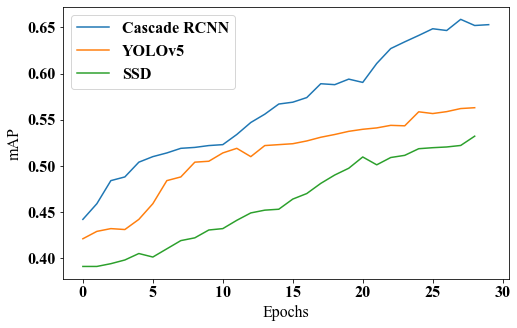

In [132]:
title = "Validation BBox mAP"
plt.figure(figsize=(8, 5))
for bbox_result in val_bbox_results:
    plt.plot(bbox_result["bbox"], label=bbox_result["model"])
plt.xlabel("Epochs")
plt.ylabel("mAP")
# plt.title(title, fontdict={"fontsize":18})
plt.legend()
save_fig(title)

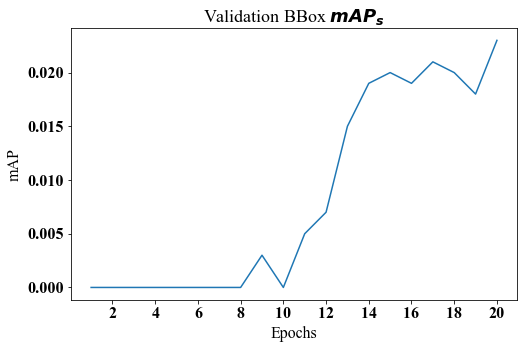

In [89]:
title = "Validation BBox mAP_s"
plt.figure(figsize=(8, 5))
plot_metric(val_df, ["bbox_mAP_s"])
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel("Epochs")
plt.ylabel("mAP")
# plt.title("Validation BBox $mAP_s$", fontdict={"fontsize":18})
save_fig(title)

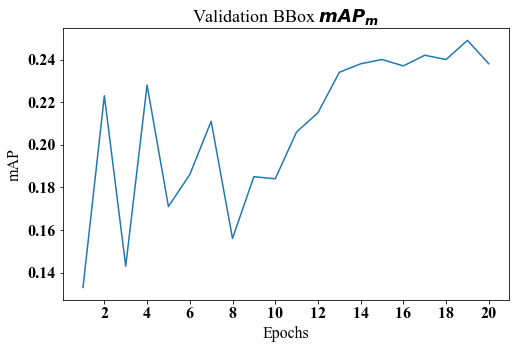

In [90]:
title = "Validation BBox mAP_m"
plt.figure(figsize=(8, 5))
plot_metric(val_df, ["bbox_mAP_m"])
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Validation BBox $mAP_m$", fontdict={"fontsize":18})
save_fig(title)

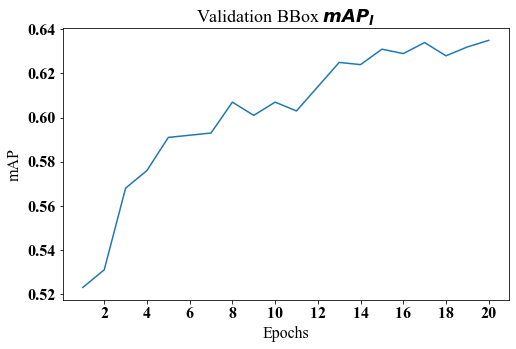

In [91]:
title = "Validation BBox mAP_l"
plt.figure(figsize=(8, 5))
plot_metric(val_df, ["bbox_mAP_l"])
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Validation BBox $mAP_l$", fontdict={"fontsize":18})
save_fig(title)